In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#use latest spark version
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 217.8MB 35kB/s 
     |████████████████████████████████| 204kB 63.4MB/s 


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"



```
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
```



In [0]:
import findspark
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

#spark.stop()
conf = SparkConf().setAppName("App")

conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '4G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '10G')
        .set('spark.task.maxFailures','1'))

findspark.init()
spark = SparkContext(conf=conf)
#spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
!pip install p_tqdm
!pip install fastparquet
!pip install hyperopt --upgrade
!pip install swifter

     |████████████████████████████████| 163kB 8.5MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 112kB 14.4MB/s 
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-cp36-none-any.whl size=3989 sha256=a4a2ced6f2c5dfafc14b5ed5e13df7ac114b80e98ae7ba165763e18ea7efdb0c
  Stored in directory: /root/.cache/pip/wheels/72/26/f7/18d7dcd10ebd3f81fab3f52e07c61b5771cd21c29f69c7a0e9
  Created wheel for pathos: filename=pathos-0.2.5-cp36-none-any.whl size=77577 sha256=11440d0c8d57d0f9186d88da2e3463fc9b5ecca7598a35bb543688e2acfeb56d
  Stored in directory: /root/.cache/pip/wheels/61/6d/83/90b0c3d2c271da2c4850731e894798c98f8dbedbac74e8eff0
  Created wheel for ppft: filename=ppft-1.6.6.1-cp36-none-any.whl size=64708 sha256=2b3b857becaba3e5643d4c3c9fcb4b6e04d90350aa028ac167773d77c288600b
  Stored in directory: /root/.cache/pip/wheels/6a/0c/53/ea8dd63608f75c1e7a64d5c5ce5d1e6d04f15ae8a6fce4c2a0
  Created wheel for pox: filename=pox-0.2.7-cp36-none-any.whl si

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import sqlite3
import csv
import datetime as dt
import math
import warnings
import gc
import random
import pickle
import pyspark

from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score

from collections import Counter
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sqlalchemy import create_engine
warnings.filterwarnings('ignore')
from tqdm import tqdm,tnrange
import swifter
import re

from hyperopt import hp,fmin,tpe,STATUS_OK,space_eval,SparkTrials

In [7]:
#Reading the data from kaggle

!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
  
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"vinodkumar9576","key":"af074010bd4c7bb75f9d1fe71f31452d"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c quora-question-pairs

# To find the list of file names in zip file
#for name in zip_file.namelist():
#    print ('%s' % (name))
#zip_file.close()

#Found this code snipper for reading files in a zipfile within a zipfile.
#https://stackoverflow.com/questions/11930515/unzip-nested-zip-files-in-python?noredirect=1&lq=1

import zipfile
from io import BytesIO
import re

with zipfile.ZipFile('/content/quora-question-pairs.zip', "r") as z:
  with z.open('train.csv.zip') as z2:
    z2_filedata = BytesIO(z2.read())
    with zipfile.ZipFile(z2_filedata) as nested_zip:
      qstns_train = pd.read_csv(nested_zip.open('train.csv'))
  with z.open('test.csv.zip') as z3:
    z3_filedata = BytesIO(z3.read())
    with zipfile.ZipFile(z3_filedata) as nested_zip2:
      qstns_test = pd.read_csv(nested_zip2.open('test.csv'),dtype = {"test_id":object,"question1":object,"question2":object})

#print("qstns_train :",end='\n')
#print(qstns_train.head(2))
#print("qstns_test :",end='\n')
#print(qstns_test.head(2))

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 4.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=37ca62a42916e2ce40ddfa9d46972108a494c4eeaf9b2e804ad1299a998d622d
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

In [0]:
if os.path.isfile('/content/drive/My Drive/Colab Notebooks/Models/Quora/qstn_train_basic_ft.parquet.gzip'):
  qstns_train_ppro = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/qstn_train_basic_ft.parquet.gzip', engine='fastparquet')
else:
  print("download qstn_train_basic_ft.parquet.gzip from drive or run previous notebook")

if os.path.isfile('/content/drive/My Drive/Colab Notebooks/Models/Quora/qstn_train_adv_ft.parquet.gzip'):
  qstns_train_nlp = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/qstn_train_adv_ft.parquet.gzip', engine='fastparquet')
else:
  print("download qstn_train_adv_ft.parquet.gzip from drive or run previous notebook")

In [0]:
#Merging qstns_train_nlp with ppro features so that original data + basic + adv feats all in one place and then we use the sample of data from it to process.
qstn_train_all_data = qstns_train_nlp.merge(qstns_train_ppro.drop(['qid1','qid2','question1','question2','is_duplicate'], axis=1), on='id', how='left')

In [8]:
qstn_train_all_data.shape

(404290, 32)

In [12]:
qstn_train_all_data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.916659,0.0,1.0,2.0,13.0,100,93,93,100,0.982456,1,1,66,57,14,12,10.0,10.0,0.434783,2,2
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.749981,0.699993,0.699993,0.0,1.0,5.0,12.5,86,63,65,73,0.571429,4,1,51,88,8,13,4.0,4.0,0.200000,5,5


In [0]:
#Sampling the data
qstn_all_data_samp = qstn_train_all_data.sample(100001)

In [0]:
#Making final_features to hold only features and assign the is_duplicate to 'y' and drop rest columns

#Removing index 0 and making indexes from 1
qstn_all_data_samp.reset_index(inplace=True)
qstn_all_data_samp.drop(qstn_all_data_samp.index[0], inplace=True)

#storing o/p values in y_true
y_true_samp = qstn_all_data_samp['is_duplicate']

#dropping id,is_duplicate columns
qstn_all_data_samp.drop(['id', 'index', 'is_duplicate'],  axis=1, inplace=True)

In [11]:
qstn_all_data_samp.head(2)

,qid1,qid2,question1,question2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2
1,113781,113782,i just finished the harry potter book series w...,what book series should i read,0.999967,0.428565,0.999967,0.999967,0.999983,0.999983,0.0,0.0,7.0,9.5,100,61,59,83,0.451613,1,2,69,31,13,6,5.0,5.0,0.277778,3,3
2,96152,427211,how do i qualify bank exams after repeated att...,how do i appear for bank exam,0.333322,0.199996,0.749981,0.749981,0.571420,0.571420,0.0,1.0,2.0,8.0,63,56,53,72,0.333333,2,1,52,31,9,7,4.0,4.0,0.250000,3,3


In [0]:
# Writing function that has all above preprocessings
from bs4 import BeautifulSoup
SAVE_DIV = 0.0001 # to avoid divide by zero


#Below stores stop words
#import nltk
#nltk.download('stopwords')
#STOP_WORDS = stopwords.words('english')

def decontracted(phrase):
  #specific
  phrase = re.sub(r"won\'t","will not",phrase)
  phrase = re.sub(r"can\'t","can not", phrase)

  #general
  phrase = re.sub(r"n\'t"," not", phrase)
  phrase = re.sub(r"\'re"," are",phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  phrase = re.sub(r'[₹]+', r' rupee ',phrase)
  phrase = re.sub(r'[$]+', r' dollar ',phrase)
  phrase = re.sub(r'[€]+', r' euro ',phrase)
  return phrase

def preprocessing(x):
  x = x.lower()
  #To Remove links
  x = re.sub(r"http\S+","",x)
  #To remove html tags
  x = BeautifulSoup(x,'lxml').get_text()
  #To expand short words to full
  x = decontracted(x)
  #To remove alphanumeric chars
  x = re.sub(r"\S*\d\S*","",x).strip()
  #To remove special characters
  x = re.sub(r"[^A-Za-z]+"," ",x).strip()
  #To make reviews lower case
  x = re.sub(r'([0-9]+)000000',r'\1m',x)
  x = re.sub(r'([0-9]+)000',r'\1k',x)
  
  # for stemming
#  porter = PorterStemmer()
#  if type(x)==type(''):
#    x = porter.stem(x)
  
  return x

In [18]:
#preprocessing each question and converting them to string
qstn_all_data_samp['question1'] = qstn_all_data_samp['question1'].fillna('').swifter.apply(preprocessing).swifter.apply(lambda x: str(x))
#.swifter.apply(lambda x: str(x))
qstn_all_data_samp['question2'] = qstn_all_data_samp['question2'].fillna('').swifter.apply(preprocessing).swifter.apply(lambda x: str(x))


In [0]:
qstns_text = qstn_all_data_samp.question1 + ' ' + qstn_all_data_samp.question2

qstn_all_data_samp.drop(['question1','question2','qid1','qid2'],inplace=True, axis=1)

qstn_all_data_samp['Text'] = qstns_text

In [20]:
qstn_all_data_samp.head(2)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2,Text
1,0.999967,0.428565,0.999967,0.999967,0.999983,0.999983,0.0,0.0,7.0,9.5,100,61,59,83,0.451613,1,2,69,31,13,6,5.0,5.0,0.277778,3,3,i just finished the harry potter book series w...
2,0.333322,0.199996,0.749981,0.749981,0.571420,0.571420,0.0,1.0,2.0,8.0,63,56,53,72,0.333333,2,1,52,31,9,7,4.0,4.0,0.250000,3,3,how do i qualify bank exams after repeated att...


In [0]:
#Sampling the data
X_train,X_test,Y_train,Y_test = train_test_split(qstn_all_data_samp, y_true_samp, stratify = y_true_samp, test_size =0.3 )

* **TfidfVectorizing**
* Calculating Tfidf separately for train and test data to avoid data leakage

In [22]:
model_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=200000, min_df=0.000032)

#calculating Tfidf for train data
train_tfidf = model_tfidf.fit_transform(X_train.Text)

#calculating Tfidf for test data
test_tfidf = model_tfidf.transform(X_test.Text)

print(f'No of Tfidf features {len(model_tfidf.get_feature_names())}')

No of Tfidf features 132974


In [0]:
#Dropping 'Text' column from train and test data
X_train.drop(['Text'],axis=1,inplace=True)
X_test.drop(['Text'],axis=1,inplace=True)

In [0]:
from scipy.sparse import hstack

X_train1 = hstack((X_train.values,train_tfidf))

X_test1 = hstack((X_test.values, test_tfidf))

In [25]:
print(X_train1)

  (0, 0)	0.4999750012499374
  (0, 1)	0.1666638889351844
  (0, 2)	0.3333222225925802
  (0, 3)	0.3333222225925802
  (0, 4)	0.3999920001599968
  (0, 5)	0.3999920001599968
  (0, 6)	1.0
  (0, 8)	6.0
  (0, 9)	8.0
  (0, 10)	48.0
  (0, 11)	48.0
  (0, 12)	45.0
  (0, 13)	45.0
  (0, 14)	0.21739130434782608
  (0, 15)	1.0
  (0, 16)	1.0
  (0, 17)	50.0
  (0, 18)	23.0
  (0, 19)	11.0
  (0, 20)	5.0
  (0, 21)	2.0
  (0, 22)	2.0
  (0, 23)	0.125
  (0, 24)	2.0
  (0, 25)	2.0
  :	:
  (69998, 49898)	0.02917349312860905
  (69998, 124819)	0.08269000785255404
  (69998, 60986)	0.07438887818755892
  (69998, 124546)	0.07063868778722673
  (69998, 3391)	0.05266978581663033
  (69998, 58531)	0.0742574015551592
  (69998, 114216)	0.060855423157589426
  (69998, 106325)	0.048181005749655635
  (69998, 123973)	0.04858293762994728
  (69999, 23026)	0.1971107282751219
  (69999, 89062)	0.3844789214911577
  (69999, 23024)	0.184049411939561
  (69999, 39709)	0.3980718249725718
  (69999, 71035)	0.3536897655393221
  (69999, 75350)	0.36

In [0]:
X_test1

* **Standardizing the data**

In [0]:
scale = StandardScaler(with_mean=False)
X_train_std = scale.fit_transform(X_train1)
X_test_std = scale.transform(X_test1)

In [37]:
print(X_train_std)

  (0, 2)	0.9910352503076275
  (0, 3)	0.9910352503076275
  (0, 4)	0.684055329254493
  (0, 5)	0.684055329254493
  (0, 8)	2.1413932514296308
  (0, 9)	3.1956366906967753
  (0, 10)	1.9886515906868638
  (0, 11)	1.978826814433735
  (0, 12)	1.137047687509109
  (0, 13)	2.1064338628889265
  (0, 14)	0.39202812497083406
  (0, 15)	0.2249157220912616
  (0, 16)	0.16243551752551433
  (0, 17)	2.161265158696116
  (0, 18)	2.823111224837833
  (0, 19)	2.2000698362770184
  (0, 20)	3.1866602268088067
  (0, 21)	0.6462238692973256
  (0, 22)	0.6462238692973256
  (0, 23)	0.48742046746430656
  (0, 24)	0.21911628704887548
  (0, 25)	0.21911628704887548
  (0, 2784)	3.967356325970057
  (0, 2944)	24.146063236655642
  (0, 2949)	44.14359691456901
  :	:
  (69999, 19)	1.1000349181385092
  (69999, 20)	1.0622200756029356
  (69999, 21)	1.2924477385946511
  (69999, 22)	1.2924477385946511
  (69999, 23)	2.399608455208894
  (69999, 24)	0.21911628704887548
  (69999, 25)	0.21911628704887548
  (69999, 7809)	3.242351764279048
  (699

# 4.4 SGD Algos

* **Using Hyperopt**

##Functions

* **Function for plotting confusion matrix**

In [0]:
def plot_confusion_matrix(test_y,predict_y):

  #Used for plotting confusion matrix
  C = confusion_matrix(test_y,predict_y)

  #Divide each element of confusion of matrix by the sum of elements in that column
  #axis = 1 - columns
  #Used for plotting Recall
  A = ((C.T)/(C.sum(axis=1))).T

  #Divide each element of confusion matrix with the sum of elements in that row
  #axis = 1 - rows
  #Used for plotting precision
  B = ((C.T)/(C.sum(axis=0))).T 

  #Plotting
  plt.figure(figsize=(20,4))
  labels=[1,2]
  
  #Plotting Confusion matrix
  cmap = sns.light_palette('blue')
  plt.subplot(1,3,1)
  sns.heatmap(C,annot=True,cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Confusion Matrix')

  #Plotting Precision
  plt.subplot(1,3,2)
  sns.heatmap(B, annot=True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Precision Matrix')
  
  #Plotting Recall
  plt.subplot(1,3,3)
  sns.heatmap(A, annot = True, cmap=cmap, fmt='.3f', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title('Recall Matrix')

  plt.show()



In [0]:
def save_best_model(model,save_name,regularizer):
  with open('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl','wb') as SGD_pkl_file:
    pickle.dump(model, SGD_pkl_file)

In [0]:
def loss_df(search_space,trials):
  defaults = {'params' : search_space.keys()}
  params = defaults['params']
  #tid - size of data points
  results_df = pd.DataFrame(columns=['tid',*params,'status'])

  for t in trials.trials:
    result_dict = t['misc']['vals']
    #changing position list value as interger and assigning to same key
    result_dict = {k:v[0] for k,v in result_dict.items()}
    result_dict = space_eval(search_space,result_dict)
    result_dict['tid'] = t['tid']
    result_dict.update(t['result'])

    results_df = pd.concat([results_df,pd.DataFrame(result_dict,index=[0])],axis=0,ignore_index=True)
    #storing only those entries that have status 'ok
  results_df = results_df[results_df.status=='ok']
 
    #changing datatypes of columns which are having as 'object' to respectives
  results_df = results_df.infer_objects()
  indices = results_df.groupby('alpha')['loss'].idxmin()
  results_df = results_df.loc[indices].sort_values('alpha')

  return results_df

In [0]:
def opt_alpha_sgd_para(search_space):

  clf = SGDClassifier(alpha=search_space['alpha'], penalty=search_space['penalty'],loss=search_space['loss'], random_state=42)
  clf.fit(X_train,Y_train)
  sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
  sig_clf.fit(X_train,Y_train)
  #Predicting Y with test data
  Y_predict = sig_clf.predict_proba(X_test)
  #calculating log-loss
  #no need to store the log error as hyperopt default stores it
  log_error = log_loss(Y_test,Y_predict, labels = clf.classes_, eps = 1e-15)

  #below don't change the 'loss' to anyother as its used by fmin or anyother hyperopt functions.
  return {'loss' : log_error, 'status' : STATUS_OK}

In [0]:
def sgd_model_hyperopt(X_train, Y_train, X_test,Y_test,search_space,loss,regularizer,save_name):

  flag = False

  if os.path.exists('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl'):
    with open('/content/drive/My Drive/Colab Notebooks/Models/Quora/SGD_'+save_name+'_'+regularizer+'.pkl','rb') as SGD_LOSS_PCKL:
      sig_clf = pickle.load(SGD_LOSS_PCKL)

  else:
    flag = True
    print('Saved file not found, Running the algorithm\n')
  
    #programe to trigger objective function for finding best alpha
    #Here divide the evaluation as all of the RAM is getting used
    #for the first 10 trials calculate the best, save trials in a picle file
    #for the next 10 trials, set trials = saved pickle and runt fmin again.
    #https://github.com/hyperopt/hyperopt/issues/267
    trials = SparkTrials(parallelism=2)
    best = fmin(fn=opt_alpha_sgd_para, 
            space=search_space, 
            algo=tpe.suggest, 
            max_evals=20, 
            trials = trials
           #,return_argmin=False
            )
  
    best_alpha = space_eval(search_space,best)['alpha']
    reg = space_eval(search_space,best)['penalty']

    print('\nBest alpha found is : ', best_alpha, '\n')
    print('\nPenalty is : ', reg, '\n')

    #train the model with found best alpha
    print('\nTraining model with found best alpha')
    clf = SGDClassifier(alpha=best_alpha, penalty = regularizer, loss = loss, random_state=42)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train, Y_train)

    #Saving best model of sig_clf
    best_SGD_LOG = sig_clf
    print('\nSaving the trained model with best alpha')
    save_best_model(best_SGD_LOG, save_name,regularizer)

    #below function returns the df of error
    error_df = loss_df(search_space,trials)
    #Saving log_error
    print('\nSaving the error file')
    error_df.to_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip',compression='gzip')
  
  #from here entire code is run irrespective of algo run

  #running below to get saved error file when algo is not ran
  if not flag:
    if os.path.exists('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip'):
      error_df= pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Models/Quora/Error_'+save_name+'_'+regularizer+'.parquet.gzip', engine='fastparquet')
      min_error_index = error_df['loss'].idxmin()
      best_alpha = error_df.loc[min_error_index]['alpha']
      print('\nBest alpha found from saved model : ', best_alpha,'\n')


  #plotting line plot of errors vs alpha
  f,ax = plt.subplots(figsize=(12,8))

  X_alpha = error_df['alpha']
  Y_log_ls = error_df['loss']

  sns.lineplot(x=X_alpha, y=Y_log_ls,markers=True)
  sns.scatterplot(x=X_alpha, y=Y_log_ls)

  for i,txt in enumerate(np.round(Y_log_ls,3)):
    ax.text(X_alpha.iloc[i],txt, (X_alpha.iloc[i],txt),fontsize=12)

  plt.grid()
  plt.title('Cross Validation Error for each alpha')
  plt.xlabel('Alpha i\'s')
  plt.ylabel('Error measure')
  plt.show()

  #Train log loss
  Y_predict_train = sig_clf.predict_proba(X_train)
  train_log_loss = log_loss(Y_train,Y_predict_train, labels=sig_clf.classes_, eps = 1e-15)
  print('For values of best alpha = ', best_alpha, '\nTrain log loss is :', train_log_loss, '\n')

  #Test log loss
  Y_predict_test = sig_clf.predict_proba(X_test) #returns array with probabilities of shape(len(X_test), no.classes)... all probabilites wrt each class
  test_log_loss = log_loss(Y_test,Y_predict_test, labels=sig_clf.classes_, eps = 1e-15)
  print('For values of best alpha = ', best_alpha, '\nTest log loss is :', test_log_loss, '\n')

  #Plotting confusion matrix
  predicted_Y = np.argmax(Y_predict_test,axis=1) # this gives positions of max values in each row 0:first column - class '0', 1:second column - class '1'
  print('Total number of test data points :', len(predicted_Y),'\n')
  plot_confusion_matrix(Y_test, predicted_Y)

  #returning model to use further out of function if we want
  return sig_clf,error_df


## SGD Logistic Regression


Best alpha found from saved model :  0.09166747656951649 



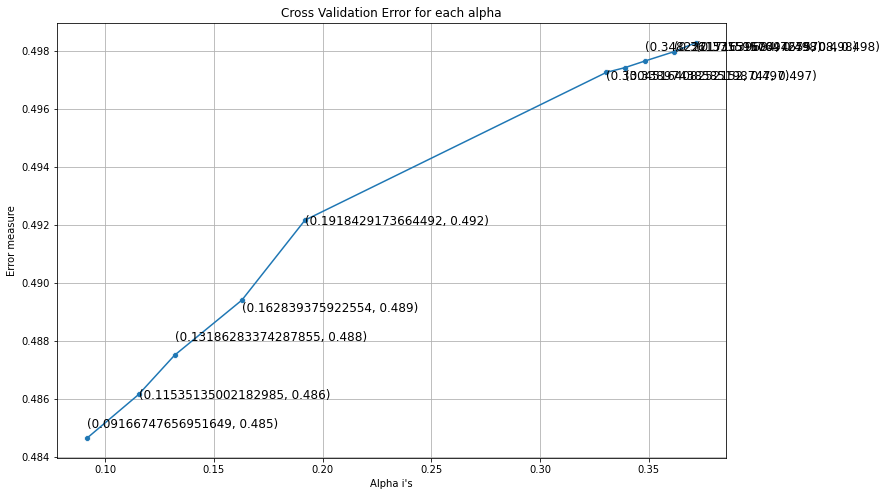

For values of best alpha =  0.09166747656951649 
Train log loss is : 0.2085800801951963 

For values of best alpha =  0.09166747656951649 
Test log loss is : 0.4512411129874729 

Total number of test data points : 30000 



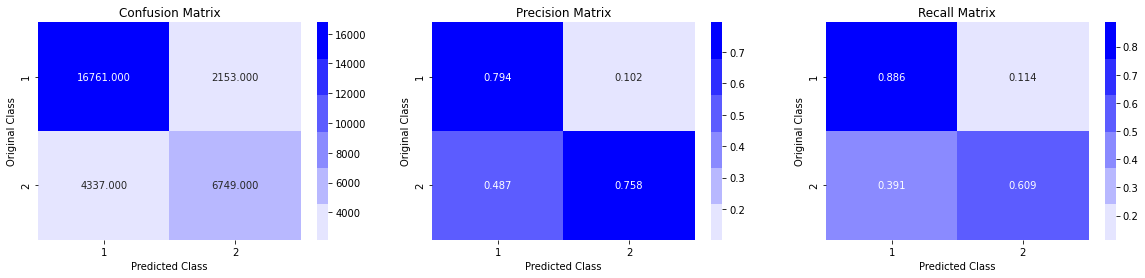

In [36]:
#driver program for logistic regression
#with l1 regularizer code took approx 6 hrs to complete 16% and also each iteration took 1000 sec
#so switching to l2 regularizer
#done using trials()

search_space = {'alpha':hp.choice('alpha',np.random.uniform(0.05,0.5,14))
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train_std, Y_train, X_test_std, Y_test,search_space,loss='log',regularizer='l2',save_name='Log_simple_std_Tfidf')

* Above result seems to be overfitting as there's more difference between train and test log loss.
* Also we used standardised data for testing model, lets use original data and see the results.

* **Using non standardized data**

Saved file not found, Running the algorithm

100%|██████████| 20/20 [03:42<00:00, 11.12s/trial, best loss: 0.4776724595440083]


Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.



Best alpha found is :  0.01 


Penalty is :  l2 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


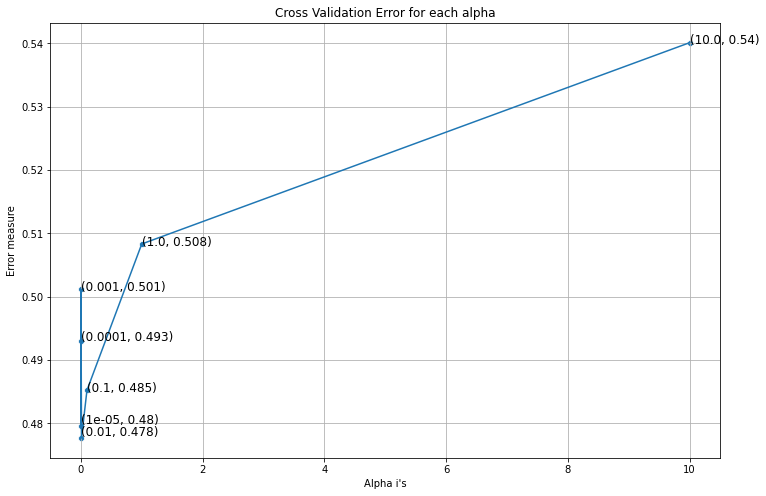

For values of best alpha =  0.01 
Train log loss is : 0.4796587570554204 

For values of best alpha =  0.01 
Test log loss is : 0.4776724595440083 

Total number of test data points : 30000 



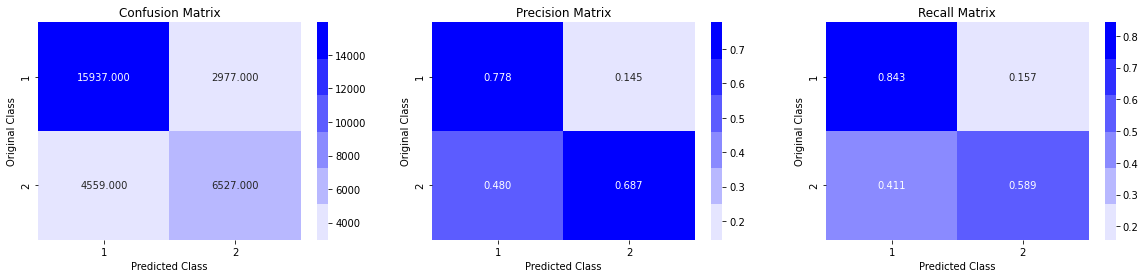

In [38]:

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='log',regularizer='l2',save_name='Log_simple_nstd_Tfidf')

* Above losses are comparable but lets try if we can reduce the overall error
* We'll standardize all features except tfidf features as tfidf vectorization already normalized with l2 reg.

In [40]:
X_test.head(1)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,len_q1,len_q2,n_words_q1,n_words_q2,words_Common,words_Total,word_Share,freq_q1+q2,freq_q1-q2
14995,0.333322,0.199996,0.666656,0.666656,0.555549,0.555549,0.0,1.0,4.0,11.0,65,57,60,63,0.5,2,5,36,51,9,13,5.0,5.0,0.238095,7,7


In [0]:
#X_train has all the features except the questions text data
#standardizing the features

scale = StandardScaler()

X_train_sm = scale.fit_transform(X_train)
X_test_sm = scale.transform(X_test)

X_train_sm_std = hstack((X_train_sm, train_tfidf))
X_test_sm_std = hstack((X_test_sm, test_tfidf))

Saved file not found, Running the algorithm

100%|██████████| 20/20 [04:16<00:00, 12.83s/trial, best loss: 0.4776724595440083]


Total Trials: 20: 20 succeeded, 0 failed, 0 cancelled.



Best alpha found is :  0.01 


Penalty is :  l2 


Training model with found best alpha

Saving the trained model with best alpha

Saving the error file


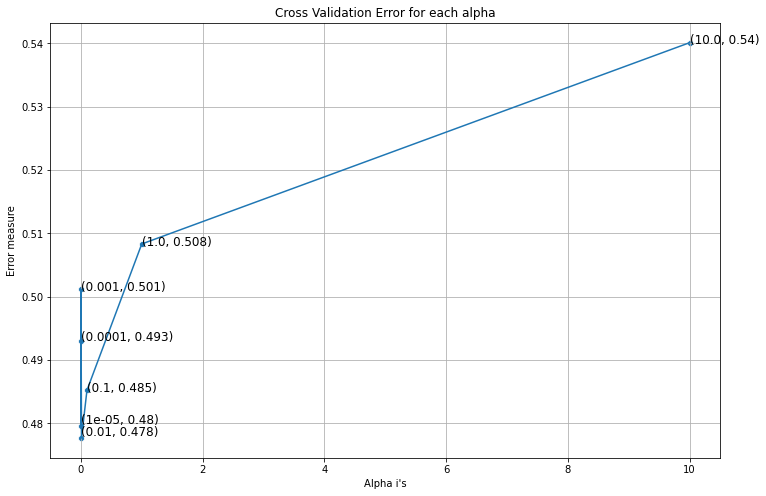

For values of best alpha =  0.01 
Train log loss is : 0.46255600840374056 

For values of best alpha =  0.01 
Test log loss is : 0.46079752148934483 

Total number of test data points : 30000 



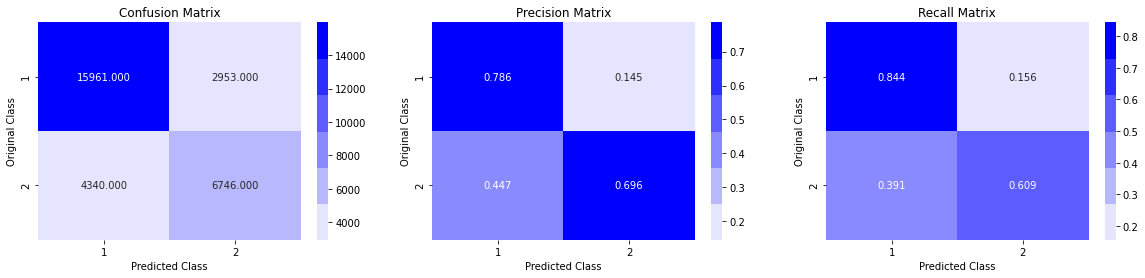

In [42]:
search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train_sm_std, Y_train, X_test_sm_std, Y_test,search_space,loss='log',regularizer='l2',save_name='Log_simple_sm_std_Tfidf')

* **Log error reduced a bit when features are standardized.**

In [0]:
#SGD log loss with l1 Regularizer

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l1']),
                'loss':hp.choice('loss',['log'])
                }

Log_regression,error_df = sgd_model_hyperopt(X_train_std, Y_train, X_test_std, Y_test,search_space,loss='log',regularizer='l1',save_name='Log_simple_Tfidf')

## 4.4 SGD using hinge Loss(LSVM) with hyperparameter tuning

In [0]:
#driver program for linear SVM with l2 regularizer
#all trials got succeeded and done using sparktrials(parallelism=2)

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l2']),
                'loss':hp.choice('loss',['hinge'])
                }

Lr_SVM,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='hinge',regularizer='l2',save_name='Hinge_avg_TfidfWeighted')

In [0]:
#driver program for linear SVM with l1 regularizer
#all trials got succeeded and done using sparktrials(parallelism=2)

search_space = {'alpha':hp.choice('alpha',[10**x for x in range(-5,2)])
                ,'penalty':hp.choice('penalty',['l1']),
                'loss':hp.choice('loss',['hinge'])
                }

Lr_SVM,error_df = sgd_model_hyperopt(X_train, Y_train, X_test, Y_test,search_space,loss='hinge',regularizer='l1',save_name='Hinge_avg_TfidfWeighted')

In [0]:
np.random.uniform(0.05,0.5,14)